<a href="https://colab.research.google.com/github/Sisipho-Hamlomo/Decision-tree/blob/main/PatchMatching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np
import os
from sklearn.decomposition import TruncatedSVD
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def split_image_into_patches(image_path, patch_size):
    # Open image using Pillow
    image = Image.open(image_path)

    # Calculate number of patches in each dimension
    num_patches_width = image.width // patch_size
    num_patches_height = image.height // patch_size

    # Create a list to store the image patches
    patches = []

    # Loop through each patch and extract it from the image
    for i in range(num_patches_height):
        for j in range(num_patches_width):
            x = j * patch_size
            y = i * patch_size
            patch = image.crop((x, y, x + patch_size, y + patch_size))
            patches.append(patch)

    return patches
#k=split_image_into_patches(image_folder_path,100)

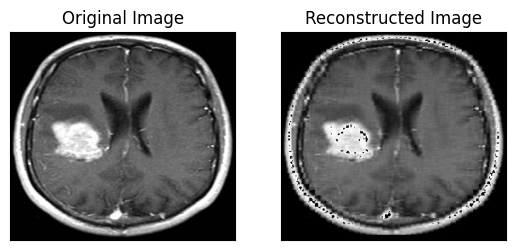

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Mount Google Drive (if using Google Drive)
#from google.colab import drive
#drive.mount('/content/drive')

# Load image
img_path = '/content/drive/MyDrive/Y11.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Set patch size
patch_size = 10

# Calculate number of patches in each dimension
num_patches_h = img.shape[0] // patch_size
num_patches_w = img.shape[1] // patch_size

# Initialize matrix to hold reconstructed image
reconstructed_img = np.zeros_like(img)

# Loop through each patch
for i in range(num_patches_h):
    for j in range(num_patches_w):
        # Get patch
        patch = img[i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size]

        # Compute weighted SVD with AIC for optimal rank
        U, S, V = np.linalg.svd(patch)
        n = patch.shape[0]
        AIC = np.cumsum(S**2) + (n**2 + n) * np.arange(1, n+1)
        rank = np.argmin(AIC)
        S[rank+1:] = 0
        patch_weighted_svd = np.dot(U[:, :rank+1], np.dot(np.diag(S[:rank+1]), V[:rank+1, :]))

        # Insert patch into reconstructed image
        reconstructed_img[i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size] = patch_weighted_svd

# Display original and reconstructed image
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(reconstructed_img, cmap='gray')
plt.title('Reconstructed Image'), plt.xticks([]), plt.yticks([])
plt.show()



In [ ]:
reconstructed_img = np.zeros_like(img)
reconstructed_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In this code, we first mount Google Drive (if using Google Drive) and load the grayscale image using the IMREAD_GRAYSCALE flag of the imread function. We then find the maximum patch size, set the initial patch size to the maximum patch size, and reduce the patch size until both dimensions are divisible by patch size. We calculate the number of patches in each dimension and initialize a matrix to hold the reconstructed image. We loop through each patch, compute the weighted SVD with AIC to optimize the rank of the SVD, and insert the resulting patch into the appropriate location in the reconstructed image matrix. Finally, we display the original and reconstructed images using matplotlib's imshow function.

(369, 400)


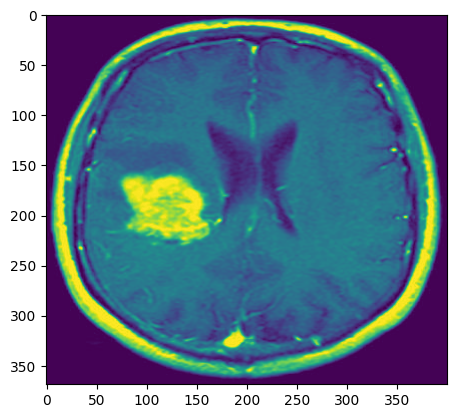

In [ ]:
# Load image
img_path = '/content/drive/MyDrive/Y11.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
print(img.shape)

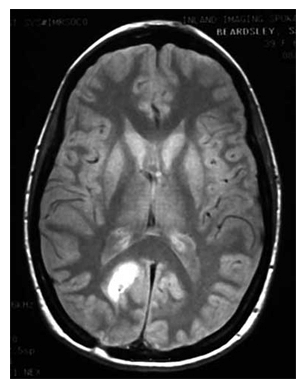

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Define the path to your image
img_path = '/content/drive/MyDrive/Y11.png'

# Read the image in grayscale
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not loaded.")
else:
    # Display the grayscale image
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.show()


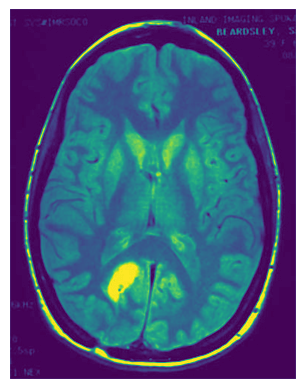

In [ ]:
img_path = '/content/drive/MyDrive/Y11.png'
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.axis('off')
plt.imshow(image)
plt.show()


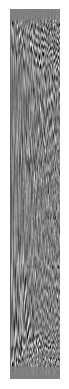

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img_path = '/content/drive/MyDrive/Y11.png'
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
# Read the uploaded image using cv2
#image = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)

# Perform SVD on the image
U, S, VT = np.linalg.svd(image, full_matrices=False)

# Define the desired compression rank (adjust as needed)
compression_rank = 50

# Reconstruct the image using a subset of singular values
compressed_image = np.dot(U[:, :compression_rank], np.dot(np.diag(S[:compression_rank]), VT[:compression_rank, :]))

# Display the original image
#plt.figure(figsize=(12, 4))
#plt.subplot(1, 4, 1)
#plt.imshow(image, cmap='gray')
#plt.title('Original Image')
#plt.axis('off')

# Display the U matrix
plt.subplot(1, 4, 2)
plt.imshow(U[:, :compression_rank], cmap='gray')
#plt.title()
plt.axis('off')
plt.show()






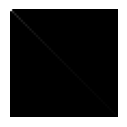

In [ ]:
# Display the Σ matrix
plt.subplot(1, 4, 3)
plt.imshow(np.diag(S[:compression_rank]), cmap='gray')
plt.axis('off')
plt.show()


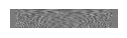

In [ ]:

# Display the V^T matrix
plt.subplot(1, 4, 4)
plt.imshow(VT[:compression_rank, :], cmap='gray')
plt.axis('off')

plt.show()



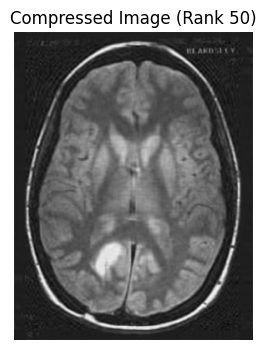

In [ ]:
# Display the compressed image
plt.figure(figsize=(6, 4))
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image (Rank {})'.format(compression_rank))
plt.axis('off')
plt.show()

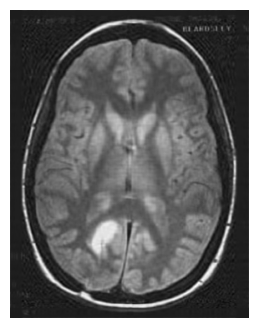

In [ ]:
# Display the compressed image
plt.figure(figsize=(6, 4))
plt.imshow(compressed_image, cmap='gray')
#plt.title('Compressed Image (Rank {})'.format(compression_rank))
plt.axis('off')
plt.show()

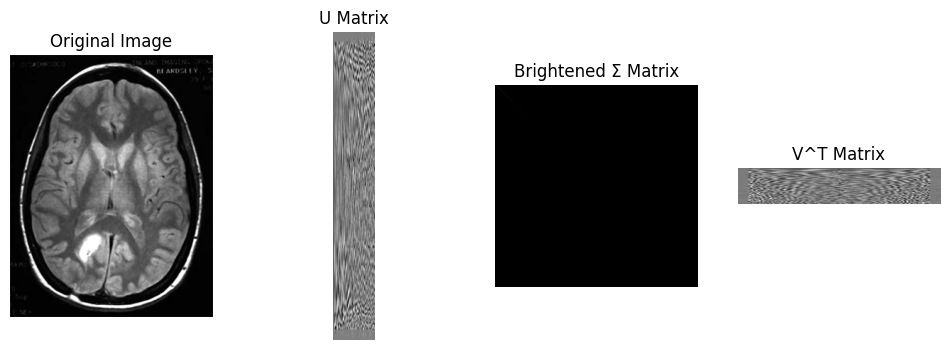

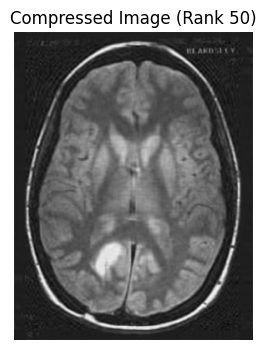

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img_path = '/content/drive/MyDrive/Y11.png'
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Perform SVD on the image
U, S, VT = np.linalg.svd(image, full_matrices=False)

# Define the desired compression rank (adjust as needed)
compression_rank = 50

# Reconstruct the image using a subset of singular values
compressed_image = np.dot(U[:, :compression_rank], np.dot(np.diag(S[:compression_rank]), VT[:compression_rank, :]))

# Make diagonal entries in Σ matrix a little brighter
brightened_S = np.diag(S)
brightness_factor = 1.2  # Adjust this factor for the desired brightness
brightened_S[:compression_rank, :compression_rank] *= brightness_factor

# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the U matrix
plt.subplot(1, 4, 2)
plt.imshow(U[:, :compression_rank], cmap='gray')
plt.title('U Matrix')
plt.axis('off')

# Display the brightened Σ matrix
plt.subplot(1, 4, 3)
plt.imshow(brightened_S, cmap='gray')
plt.title('Brightened Σ Matrix')
plt.axis('off')

# Display the V^T matrix
plt.subplot(1, 4, 4)
plt.imshow(VT[:compression_rank, :], cmap='gray')
plt.title('V^T Matrix')
plt.axis('off')

plt.show()

# Display the compressed image
plt.figure(figsize=(6, 4))
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image (Rank {})'.format(compression_rank))
plt.axis('off')
plt.show()


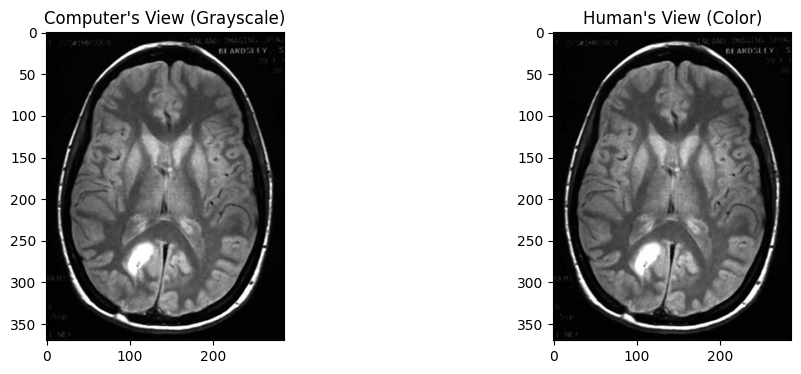

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Required to display images in Colab

# Load the uploaded image (replace 'your_image.jpg' with the actual file name)
image_path = '/content/drive/MyDrive/Y11.png'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a figure with two subplots
plt.figure(figsize=(12, 4))

# Plot the grayscale image on the left
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Computer's View (Grayscale)")

# Plot the color image on the right
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Human's View (Color)")

# Display the figure
plt.show()



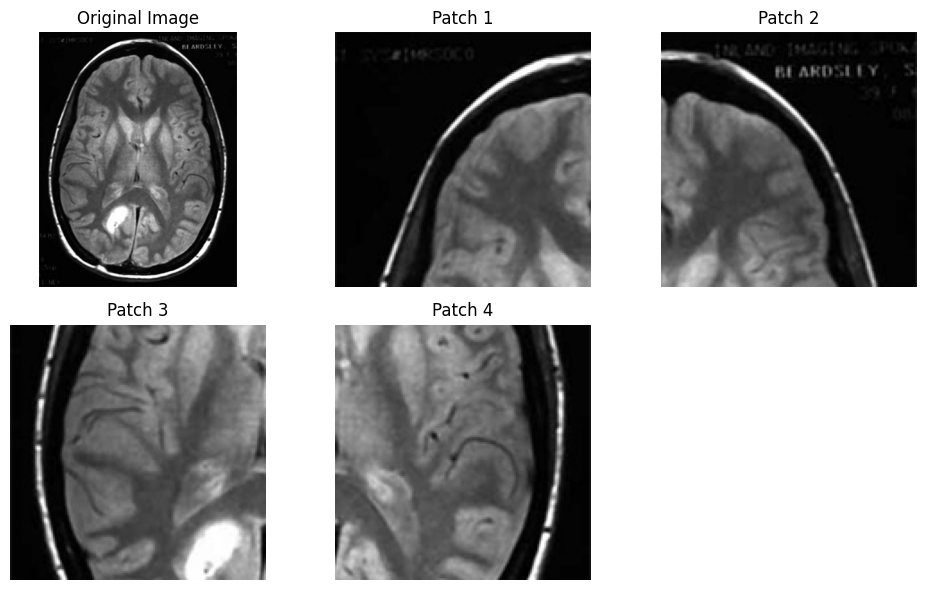

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/Y11.png'
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)


# Define the number of square patches (e.g., 6)
num_patches = 6

# Calculate the size of each square patch
patch_size = min(image.shape[0], image.shape[1]) // int(np.sqrt(num_patches))

# Split the image into square patches
patches = []
for i in range(int(np.sqrt(num_patches))):
    for j in range(int(np.sqrt(num_patches))):
        patch = image[i * patch_size:(i + 1) * patch_size, j * patch_size:(j + 1) * patch_size]
        patches.append(patch)

# Display the original image and the square patches
plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

for i, patch in enumerate(patches):
    plt.subplot(2, 3, i + 2)
    plt.imshow(cv2.cvtColor(patch, cv2.COLOR_BGR2RGB))
    plt.title(f'Patch {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


# New Section

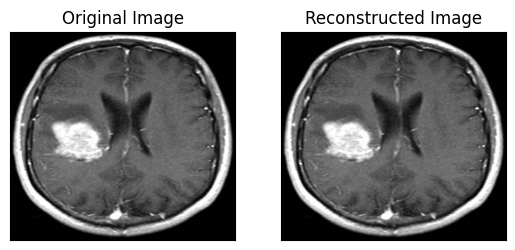

In [ ]:
# Find maximum patch size
max_patch_size = min(img.shape[0], img.shape[1])

# Set initial patch size to maximum patch size
patch_size = max_patch_size

# Reduce patch size until both dimensions are divisible by patch size
while img.shape[0] % patch_size != 0 or img.shape[1] % patch_size != 0:
    patch_size -= 1

# Calculate number of patches in each dimension
num_patches_h = img.shape[0] // patch_size
num_patches_w = img.shape[1] // patch_size

# Initialize matrix to hold reconstructed image
reconstructed_img = np.zeros_like(img)

# Loop through each patch
for i in range(num_patches_h):
    for j in range(num_patches_w):
        # Get patch
        patch = img[i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size]

        # Compute weighted SVD with AIC for optimal rank
        U, S, V = np.linalg.svd(patch)
        n = patch.shape[0]
        AIC = np.cumsum(S**2) + (n**2 + n) * np.arange(1, n+1)
        rank = np.argmin(AIC)
        S[rank+1:] = 0
        patch_weighted_svd = np.dot(U[:, :rank+1], np.dot(np.diag(S[:rank+1]), V[:rank+1, :]))

        # Insert patch into reconstructed image
        reconstructed_img[i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size] = patch_weighted_svd

# Display original and reconstructed image
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(reconstructed_img, cmap='gray')
plt.title('Reconstructed Image'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt



def image_to_matrix(image_path):
  """
  Load the image at the given path and convert it to a numpy array.
  """
  image = Image.open(image_path).convert('L')
  return np.array(image)

def matrix_to_image(matrix):
  """
  Convert the given numpy array to an image.
  """
  return Image.fromarray(matrix).convert('L')

def apply_svd(matrix, n_components):
  """
  Apply SVD to the given matrix and return the compressed matrix using
  the specified number of singular values.
  """
  U, s, Vt = np.linalg.svd(matrix, full_matrices=False)
  compressed_s = np.zeros_like(s)
  compressed_s[:n_components] = s[:n_components]
  return U @ np.diag(compressed_s) @ Vt

def apply_svd_to_patches(matrix, patch_size, n_components):
  """
  Split the given matrix into patches of the specified size and apply
  SVD to each patch using the specified number of singular values.
  """
  patches = [matrix[i:i+patch_size, j:j+patch_size]
             for i in range(0, matrix.shape[0], patch_size)
             for j in range(0, matrix.shape[1], patch_size)]
  compressed_patches = [apply_svd(patch, n_components) for patch in patches]
  return np.array(compressed_patches)

def reconstruct_image_from_patches(patches, original_shape, patch_size):
  """
  Reconstruct the original image from the given patches by putting them
  back in their original positions.
  """
  reconstructed_image = np.zeros(original_shape)
  k = 0
  for i in range(0, original_shape[0], patch_size):
    for j in range(0, original_shape[1], patch_size):
      reconstructed_image[i:i+patch_size, j:j+patch_size] = patches[k]
      k += 1
  return reconstructed_image

def plot_snr_vs_components(image_path, patch_size, n_components_range):
  """
  Load the image at the given path, apply SVD to the entire image and to
  patches of the specified size, and plot the signal-to-noise ratio vs
  the number of components retained for both the original and reconstructed image.
  """
  # Load the image and apply SVD
  image = image_to_matrix(image_path)
  compressed_image = apply_svd(image, max(image.shape))

  # Apply SVD to patches and reconstruct image
  compressed_patches = apply_svd_to_patches(image, patch_size, max(image.shape))
  reconstructed_patches = np.zeros_like(compressed_patches)
  for i, patch in enumerate(compressed_patches):
    reconstructed_patches[i] = apply_svd(patch, max(image.shape))
  reconstructed_image = reconstruct_image_from_patches(reconstructed_patches, image.shape, patch_size)

  # Compute signal-to-noise ratio
  snr_values = []
  for n_components in n_components_range:
    compressed_image_patch = apply_svd(compressed_image, n_components)
    reconstructed_patches = np.zeros_like(compressed_patches)
    for i, patch in enumerate(compressed_patches):
      reconstructed_patches[i] = apply_svd(patch, n_components)
    reconstructed_image = reconstruct_image_from_patches(reconstructed_patches, image.shape, patch_size)
    snr = 10 * np.log10(np.sum(compressed_image ** 2) / np.sum((reconstructed_image - compressed_image_patch) ** 2))
    snr_values.append(snr)

  # Plot the signal-to-noise


  # Plot the signal-to-noise ratio vs number of components retained
  plt.plot(n_components_range, snr_values)
  plt.title('Signal-to-Noise Ratio vs Number of Components Retained')
  plt.xlabel('Number of Components Retained')
  plt.ylabel('Signal-to-Noise Ratio (dB)')
  plt.show()


NameError: ignored

<ipython-input-19-97e54be86394>:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(compressed_patches)


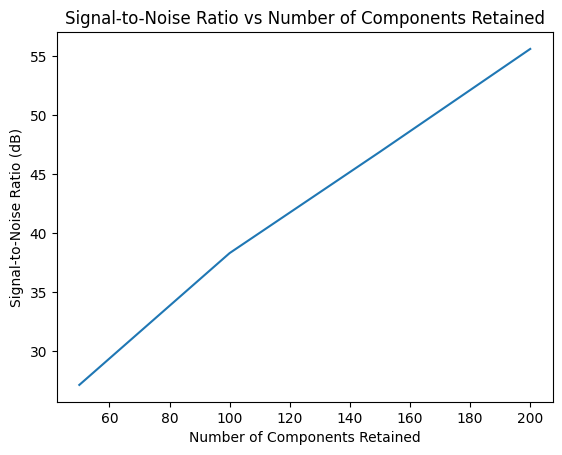

**Pie chart**

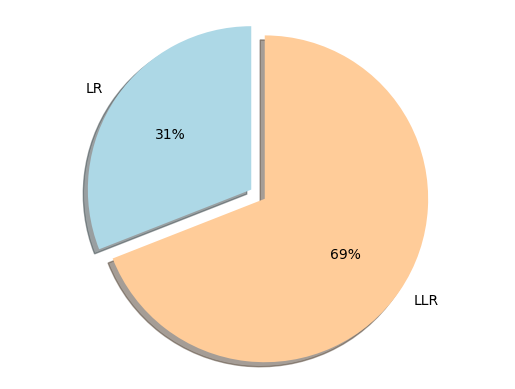

In [ ]:
import matplotlib.pyplot as plt

labels = ['LR', 'LLR']
sizes = [13/42, 29/42]
colors = ['#ADD8E6', '#FFCC99']
explode = (0, 0.1)  # Add some "explode" to the second slice for emphasis

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, explode=explode,
       autopct='%1.0f%%', startangle=90, shadow=True)
ax.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

# Add a fancy legend with custom colors
legend_colors = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
#ax.legend(legend_colors, loc='upper right')

plt.show()


In [ ]:
!pip install plotly

import plotly.graph_objects as go

labels = ['LR', 'LLR']
sizes = [34, 66]
colors = ['#ADD8E6', '#FFCC99']

fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=.5)])

fig.update_traces(marker=dict(colors=colors))
fig.update_layout(title='Pie Chart', title_font_size=20)

fig.show()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


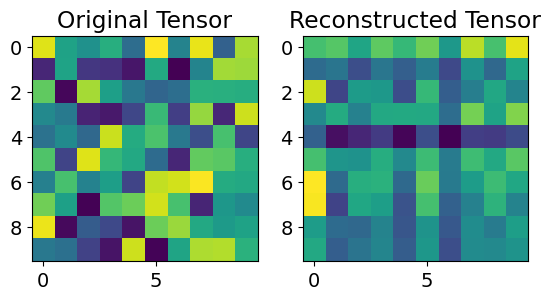

In [ ]:
#!pip install tensorly

import tensorly as tl
import numpy as np
import matplotlib.pyplot as plt

# Generate a random tensor
tensor = np.random.random((10, 10, 10))

# Perform CP decomposition
rank = 3  # Set the rank of the decomposition
factors = tl.decomposition.parafac(tensor, rank=rank)

# Reconstruct the tensor using the decomposition
reconstructed_tensor = tl.kruskal_to_tensor(factors)

# Convert NumPy arrays for visualization
tensor_np = np.array(tensor)
reconstructed_tensor_np = np.array(reconstructed_tensor)

# Plot the original and reconstructed tensors
fig, axes = plt.subplots(1, 2)
axes[0].imshow(tensor_np[:, :, 0])
axes[0].set_title('Original Tensor')
axes[1].imshow(reconstructed_tensor_np[:, :, 0])
axes[1].set_title('Reconstructed Tensor')

plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create a list of fictional tweets
tweets = [
    "I love coding in Python",
    "Data science is fascinating",
    "Social media analysis is fun",
    "Text analysis can reveal insights",
]

# Initialize a CountVectorizer to convert text to a matrix of word frequencies
vectorizer = CountVectorizer()

# Fit the vectorizer to the tweets and transform them into a matrix
matrix = vectorizer.fit_transform(tweets)

# Create a DataFrame to visualize the matrix
matrix_df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Print the matrix
print(matrix_df)



   analysis  can  coding  data  fascinating  fun  in  insights  is  love  \
0         0    0       1     0            0    0   1         0   0     1   
1         0    0       0     1            1    0   0         0   1     0   
2         1    0       0     0            0    1   0         0   1     0   
3         1    1       0     0            0    0   0         1   0     0   

   media  python  reveal  science  social  text  
0      0       1       0        0       0     0  
1      0       0       0        1       0     0  
2      1       0       0        0       1     0  
3      0       0       1        0       0     1  
